In [1]:
import pandas as pd
df = pd.read_csv('bank-full.csv', sep=';')
print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [2]:
for col_name in df.columns:
    if type(df[col_name][0]) == str:
        unique = list(set(df[col_name]))
        for (replacee, replacer) in zip(unique, range(len(unique))):
            df[col_name] = df[col_name].replace(replacee, replacer)
            
print(df)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       58    7        0          2        0     2143        1     0        1   
1       44    0        1          1        0       29        1     0        1   
2       33   10        0          1        0        2        1     1        1   
3       47    5        0          0        0     1506        1     0        1   
4       33    8        1          0        0        1        0     0        1   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45206   51    0        0          2        0      825        0     0        0   
45207   71    4        2          3        0     1729        0     0        0   
45208   72    4        0          1        0     5715        0     0        0   
45209   57    5        0          1        0      668        0     0        2   
45210   37   10        0          1        0     2971        0     0        0   

       day  month  duration

In [3]:
import pandas as pd
from sklearn import preprocessing

x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
print(df)

              0         1    2         3    4         5    6    7    8  \
0      0.519481  0.636364  0.0  0.666667  0.0  0.092259  1.0  0.0  0.5   
1      0.337662  0.000000  0.5  0.333333  0.0  0.073067  1.0  0.0  0.5   
2      0.194805  0.909091  0.0  0.333333  0.0  0.072822  1.0  1.0  0.5   
3      0.376623  0.454545  0.0  0.000000  0.0  0.086476  1.0  0.0  0.5   
4      0.194805  0.727273  0.5  0.000000  0.0  0.072812  0.0  0.0  0.5   
...         ...       ...  ...       ...  ...       ...  ...  ...  ...   
45206  0.428571  0.000000  0.0  0.666667  0.0  0.080293  0.0  0.0  0.0   
45207  0.688312  0.363636  1.0  1.000000  0.0  0.088501  0.0  0.0  0.0   
45208  0.701299  0.363636  0.0  0.333333  0.0  0.124689  0.0  0.0  0.0   
45209  0.506494  0.454545  0.0  0.333333  0.0  0.078868  0.0  0.0  1.0   
45210  0.246753  0.909091  0.0  0.333333  0.0  0.099777  0.0  0.0  0.0   

              9   10        11        12        13        14        15   16  
0      0.133333  1.0  0.053070  0

In [49]:
from sklearn.utils import shuffle
df = shuffle(df)
trainingSet = df[:35000]
testingSet = df[35001:]
XtrainingSet = trainingSet.loc[:, :15]
XtestingSet = testingSet.loc[:, :15]
ytrainingSet = trainingSet.loc[:, 16]
ytestingSet = testingSet.loc[:, 16]
print(XtrainingSet.loc[:,13:14])

             13        14
8968   0.000000  0.000000
6060   0.000000  0.000000
6297   0.000000  0.000000
24282  0.000000  0.000000
12203  0.000000  0.000000
...         ...       ...
12745  0.000000  0.000000
32952  0.000000  0.000000
31743  0.161697  0.010909
4175   0.000000  0.000000
10593  0.000000  0.000000

[35000 rows x 2 columns]


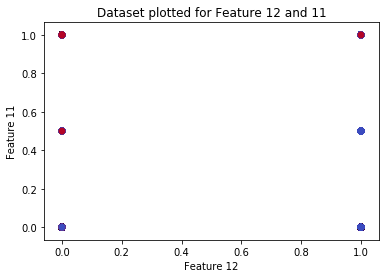

[0.0, 1.0]


In [59]:
import matplotlib.pyplot as plt
plt.scatter(XtrainingSet.loc[:, 7], XtrainingSet.loc[:, 8], c=df[:35000][16], cmap=plt.cm.coolwarm)
plt.xlabel('Feature 12')
plt.ylabel('Feature 11')
plt.title('Dataset plotted for Feature 12 and 11')
plt.savefig('Plotdata1211.png')
plt.show()
print(list(set(df[16])))

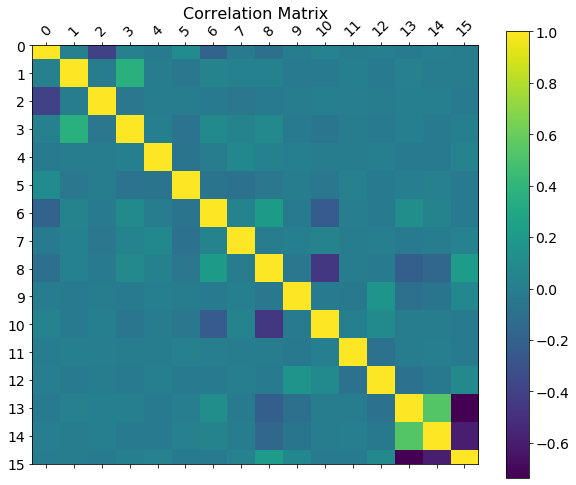

In [35]:
import matplotlib.pyplot as plt
f = plt.figure(figsize=(10,8))
plt.matshow(XtrainingSet.corr(), fignum=f.number)
plt.xticks(range(XtrainingSet.shape[1]), XtrainingSet.columns, fontsize=14, rotation=45)
plt.yticks(range(XtrainingSet.shape[1]), XtrainingSet.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()

In [55]:
from sklearn.linear_model import LogisticRegression
import time
logistic = LogisticRegression(solver = 'lbfgs', max_iter=300)
start_time = time.time()
logistic.fit(XtrainingSet, ytrainingSet)
print("--- %s seconds ---" % (time.time() - start_time))
ypredicted_log = logistic.predict(XtestingSet)
ypredictedprob_log = logistic.predict_proba(XtestingSet)
logisticScore = logistic.score(XtestingSet, ytestingSet)
print("Predicted Probabilities for Logistic Model:\n", ypredictedprob_log)
print("\n Logistic Coefficients:\n" , logistic.coef_)
print("\n Logistic Score:\n" , logisticScore)

--- 0.8801705837249756 seconds ---
Predicted Probabilities for Logistic Model:
 [[0.95811436 0.04188564]
 [0.50561941 0.49438059]
 [0.8596299  0.1403701 ]
 ...
 [0.98263845 0.01736155]
 [0.95550441 0.04449559]
 [0.95411992 0.04588008]]

 Logistic Coefficients:
 [[ 0.3197647   0.1574332   0.3538334  -0.13297475 -0.44574807  1.85695249
  -1.03696903 -0.66145741 -1.05466932 -0.13563776 -0.01764369 17.3699126
  -4.70983552  4.557924    3.45358819 -2.63994506]]

 Logistic Score:
 0.8922624877571009


In [56]:
from sklearn import svm
svmModel = svm.SVC(kernel = 'rbf', C = 1.0, probability=True)
start_time = time.time()
svmModel.fit(XtrainingSet, ytrainingSet)
print("--- %s seconds ---" % (time.time() - start_time))
ypredicted_svm = svmModel.predict(XtestingSet)
ypredictedprob_svm = svmModel.predict_proba(XtestingSet)
svmScore = svmModel.score(XtestingSet, ytestingSet)
print("Predicted Probabilities for Logistic Model:\n", ypredictedprob_svm)
print("\n Logistic Score:\n" , svmScore)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


--- 204.32976651191711 seconds ---
Predicted Probabilities for Logistic Model:
 [[0.90953301 0.09046699]
 [0.78893395 0.21106605]
 [0.91401599 0.08598401]
 ...
 [0.94760102 0.05239898]
 [0.92126511 0.07873489]
 [0.93351681 0.06648319]]

 Logistic Score:
 0.8865817825661116


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


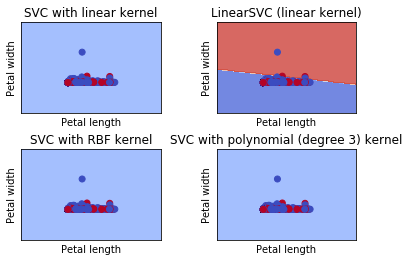

In [68]:
import numpy as np
from sklearn import svm
h=0.02
x_min, x_max = XtrainingSet.loc[:, 13].min() - 1, XtrainingSet.loc[:, 13].max() + 1
y_min, y_max = XtrainingSet.loc[:, 14].min() - 1, XtrainingSet.loc[:, 14].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
            np.arange(y_min, y_max, h))
# title for the plots
C = 1.0  # SVM regularization parameter
# SVC with linear kernel
svc = svm.SVC(kernel='linear', C=C).fit(XtrainingSet.loc[:,13:14], ytrainingSet)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C).fit(XtrainingSet.loc[:,13:14], ytrainingSet)
# SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(XtrainingSet.loc[:,13:14], ytrainingSet)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(XtrainingSet.loc[:,13:14], ytrainingSet)
titles = ['SVC with linear kernel',
  'LinearSVC (linear kernel)',
  'SVC with RBF kernel',
  'SVC with polynomial (degree 3) kernel']
 
 
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
 
    # Plot also the training points
    plt.scatter(XtrainingSet.loc[:,13], XtrainingSet.loc[:,14], c=ytrainingSet, cmap=plt.cm.coolwarm)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
 
plt.show()

In [37]:
from sklearn.neural_network import MLPClassifier
mlpModel = MLPClassifier(solver = 'lbfgs', max_iter=300, alpha=1e-5, verbose=10, tol=1e-4, random_state=1,
                         learning_rate_init=.1)
start_time = time.time()
mlpModel.fit(XtrainingSet, ytrainingSet)
print("--- %s seconds ---" % (time.time() - start_time))
ypredicted_mlp = mlpModel.predict_proba(XtestingSet)
ypredictedprob_mlp = mlpModel.predict_proba(XtestingSet)
mlpScore = mlpModel.score(XtestingSet, ytestingSet)
print("MLP Score", mlpScore)
print("weights between input and first hidden layer:")
print(mlpModel.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(mlpModel.coefs_[1])

--- 29.703973531723022 seconds ---
MLP Score 0.9024485798237023
weights between input and first hidden layer:
[[ 0.16420948  0.00293178 -0.41085558 ... -0.0086284  -0.32661034
   0.18964687]
 [ 0.20233068 -0.23822743 -0.18086236 ... -0.26098525 -0.22680341
   1.07591512]
 [ 0.5909329  -0.10785925 -0.11275618 ... -0.38331947  0.10478057
  -0.78392585]
 ...
 [ 0.10433406 -0.11348563  0.07036397 ... -0.04766261  0.20484384
   0.61193416]
 [-0.00178297 -0.05093429  0.09846582 ...  0.06464561 -0.00411874
   0.23445205]
 [-0.29357447  0.16698684 -0.63338456 ... -0.16773936 -0.19577292
  -0.49716307]]

weights between first hidden and second hidden layer:
[[-2.53240305e-01]
 [-7.54301987e-01]
 [-9.02955158e-01]
 [ 1.51019084e-01]
 [-2.28784669e-01]
 [-2.99841585e+00]
 [-5.29971310e-01]
 [ 7.26420800e-02]
 [-8.98336705e-02]
 [-1.21694107e-01]
 [ 4.19227492e-01]
 [ 1.14464600e-01]
 [ 4.29000798e-01]
 [-3.22914183e-01]
 [-2.65980275e+00]
 [ 3.82447464e-02]
 [-1.07547904e-01]
 [-5.09582819e-02]
 

In [39]:
from sklearn.neighbors import KNeighborsClassifier
for i in range(100):
    knnModel = KNeighborsClassifier(n_neighbors=i)
    knnModel.fit(XtrainingSet, ytrainingSet)
start_time = time.time()

print("--- %s seconds ---" % (time.time() - start_time))
ypredicted_knn = knnModel.predict(XtestingSet)
ypredictedprob_knn = knnModel.predict_proba(XtestingSet)
knnScore = knnModel.score(XtestingSet, ytestingSet)
print(knnScore)

--- 0.2611081600189209 seconds ---
0.8870714985308521


In [9]:
import numpy as np
%matplotlib inline
objects = ('LogisticR', 'SVM', 'MLP', 'KNN')
accuracyArray = np.array([logisticScore, svmScore, mlpScore, knnScore])*100
y_pos = np.arange(len(objects))
plt.bar(y_pos, accuracyArray, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy in %')
plt.title('Comparison Among Different Models')
plt.savefig('accuracy.png')
plt.show()

NameError: name 'mlpScore' is not defined

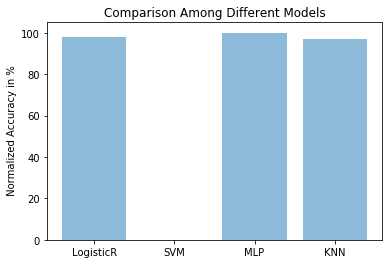

In [11]:
normalizedAccuracyArray = ((accuracyArray-min(accuracyArray))/(max(accuracyArray) - min(accuracyArray)))*100
plt.bar(y_pos, normalizedAccuracyArray, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel(' Normalized Accuracy in %')
plt.title('Comparison Among Different Models')
plt.savefig('normalizedAccuracy.png')
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.796


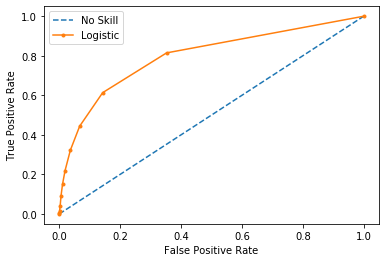

5458     0.0
34756    0.0
645      0.0
34708    0.0
23430    0.0
        ... 
1042     0.0
43540    1.0
15026    0.0
19217    0.0
14170    0.0
Name: 16, Length: 10210, dtype: float64


In [22]:
# predict probabilities
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
ns_probs = [1 for _ in range(len(ytestingSet))]
lr_probs = ypredictedprob_knn
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
# calculate scores
ns_auc = roc_auc_score(ytestingSet, ns_probs)
lr_auc = roc_auc_score(ytestingSet, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ytestingSet, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytestingSet, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.savefig('ROC_svm_wrong.png')
plt.show()
print(ytestingSet)

No Skill: f1=0.202 auc=0.556
Logistic: f1=0.285 auc=0.487


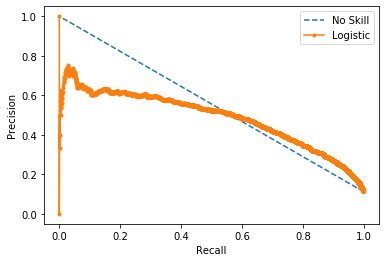

In [11]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
# calculate precision and recall for each threshold
ns_precision, ns_recall, _ = precision_recall_curve(ytestingSet, ns_probs)
lr_precision, lr_recall, _ = precision_recall_curve(ytestingSet, lr_probs)
# calculate scores
ns_f1, ns_auc = f1_score(ytestingSet, ns_probs), auc(ns_recall, ns_precision)
lr_f1, lr_auc = f1_score(ytestingSet, ypredicted_log), auc(lr_recall, lr_precision)
# summarize scores
print('No Skill: f1=%.3f auc=%.3f' % (ns_f1, ns_auc))
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
plt.plot(ns_recall, ns_precision, linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.savefig('PR_knn.png')
plt.show()